In [2]:
import pandas as pd
df_french = pd.read_csv('C:\\Users\\user\\Downloads\\DP_Rep_21_03.csv')
df_french.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,2020-03-21 23:59:37,mobuis1,AlainV18,1,0,0,Et au fait... quand je commence ma phrase par ...,NaN,NaN,NaN,1241514836317659137,https://twitter.com/mobuis1/status/12415148363...
1,2020-03-21 23:57:19,OracleTomnoth,DisneyPlusFR,0,0,0,Bien que j'en ai rien à secouer de la sortie f...,NaN,@DisneyPlusFR @gouvernementFR,NaN,1241514256320905216,https://twitter.com/OracleTomnoth/status/12415...
2,2020-03-21 23:57:18,Black_Wool27,phoenixfpI,1,0,0,Parce que tu as vu des baisses de connections ...,NaN,NaN,NaN,1241514253615616000,https://twitter.com/Black_Wool27/status/124151...
3,2020-03-21 23:57:15,Lazarevic59,ZebraSense,0,0,0,"Bonjour, pourquoi aucune saturation ne serait ...",NaN,NaN,NaN,1241514238482448385,https://twitter.com/Lazarevic59/status/1241514...
4,2020-03-21 23:56:37,Black_Wool27,matt7593,0,0,1,Ils mentent en permanence pour essayer de calm...,NaN,NaN,NaN,1241514077949747201,https://twitter.com/Black_Wool27/status/124151...


In [5]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', df_french.shape[0]+1)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [6]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import FrenchStemmer
import nltk
raw_stopword_list = ["Ap.", "Apr.", "GHz", "MHz", 'ça', "a", "afin", "ah", "ai", 
                     "aie", "aient", 'le','pas', "alors", "après", "as", "attendu", 
                     "au", "au-delà", "au-devant", "aucun", "aucune", "audit", "auprès",
                     "auquel", "aura", "aurai", "auraient", "aurais", "aurait", "auras", 
                     "aurez", "auriez", "aurions", "aurons", "auront", "aussi", "autour",
                     "autre", "autres", "autrui", "aux", "auxdites", "auxdits", "auxquelles",
                     "auxquels", "avaient", "avais", "avait", "avant", "avec", "avez", "aviez",
                     "avions", "avons", "de", "ayez", "ayons", "b", "bah", "banco", "ben", "bien",
                     "bé", "c", "c'", "c'est", "c'était", "car", "ce", "ceci", "cela", "celle",
                     "celle-ci", "celle-là", "celles", "celles-ci", "celles-là", "celui", "celui-ci",
                     "celui-là", "celà", "cent", "cents", "cependant", "certain", "certaine", "certaines", "certains", "ces", "cet", "cette", "ceux", "ceux-ci", "ceux-là", "cf.", "cg", "cgr", "chacun", "chacune", "chaque", "chez", "ci", "cinq", "cinquante", "cinquante-cinq", "cinquante-deux", "cinquante-et-un", "cinquante-huit", "cinquante-neuf", "cinquante-quatre", "cinquante-sept", "cinquante-six", "cinquante-trois", "cl", "cm", "cm²", "comme", "contre", "d", "d'", "d'après", "d'un", "d'une", "dans", "de", "depuis", "derrière", "des", "desdites", "desdits", "desquelles", "desquels", "deux", "devant", "devers", "dg", "différentes", "différents", "divers", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", "dl", "dm", "donc", "dont", "douze", "du", "dudit", "duquel", "durant", "dès", "déjà", "e", "eh", "elle", "elles", "en", "en-dehors", "encore", "enfin", "entre", "envers", "es", "est", "et", "eu", "eue", "eues", "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "eûmes", "eût", "eûtes", "f", "fait", "fi", "flac", "fors", "furent", "fus", "fusse", "fussent", "fusses", "fussiez", "fussions", "fut", "fûmes", "fût", "fûtes", "g", "gr", "h", "ha", "han", "hein", "hem", "heu", "hg", "hl", "hm", "hm³", "holà", "hop", "hormis", "hors", "huit", "hum", "hé", "i", "ici", "il", "ils", "j", "j'", "j'ai", "j'avais", "j'étais", "jamais", "je", "jusqu'", "jusqu'au", "jusqu'aux", "jusqu'à", "jusque", "k", "kg", "km", "km²", "l", "l'", "l'autre", "l'on", "l'un", "l'une", "la", "laquelle", "le", "lequel", "les", "lesquelles", "lesquels", "leur", "leurs", "lez", "lors", "lorsqu'", "lorsque", "lui", "lès", "m", "m'", "ma", "maint", "mainte", "maintes", "maints", "mais", "malgré", "me", "mes", "mg", "mgr", "mil", "mille", "milliards", "millions", "ml", "mm", "mm²", "moi", "moins", "mon", "moyennant", "mt", "m²", "m³", "même", "mêmes", "n", "n'avait", "n'y", "ne", "neuf", "ni", "non", "nonante", "nonobstant", "nos", "notre", "nous", "nul", "nulle", "nº", "néanmoins", "o", "octante", "oh", "on", "ont", "onze", "or", "ou", "outre", "où", "p", "par", "par-delà", "parbleu", "parce", "parmi", "pas", "passé", "pendant", "personne", "peu", "plus", "plus_d'un", "plus_d'une", "plusieurs", "pour", "pourquoi", "pourtant", "pourvu", "près", "puisqu'", "puisque", "q", "qu", "qu'", "qu'elle", "qu'elles", "qu'il", "qu'ils", "qu'on", "quand", "quant", "quarante", "quarante-cinq", "quarante-deux", "quarante-et-un", "quarante-huit", "quarante-neuf", "quarante-quatre", "quarante-sept", "quarante-six", "quarante-trois", "quatorze", "quatre", "quatre-vingt", "quatre-vingt-cinq", "quatre-vingt-deux", "quatre-vingt-dix", "quatre-vingt-dix-huit", "quatre-vingt-dix-neuf", "quatre-vingt-dix-sept", "quatre-vingt-douze", "quatre-vingt-huit", "quatre-vingt-neuf", "quatre-vingt-onze", "quatre-vingt-quatorze", "quatre-vingt-quatre", "quatre-vingt-quinze", "quatre-vingt-seize", "quatre-vingt-sept", "quatre-vingt-six", "quatre-vingt-treize", "quatre-vingt-trois", "quatre-vingt-un", "quatre-vingt-une", "quatre-vingts", "que", "quel", "quelle", "quelles", "quelqu'", "quelqu'un", "quelqu'une", "quelque", "quelques", "quelques-unes", "quelques-uns", "quels", "qui", "quiconque", "quinze", "quoi", "quoiqu'", "quoique", "r", "revoici", "revoilà", "rien", "s", "s'", "sa", "sans", "sauf", "se", "seize", "selon", "sept", "septante", "sera", "serai", "seraient", "serais", "serait", "seras", "serez", "seriez", "serions", "serons", "seront", "ses", "si", "sinon", "six", "soi", "soient", "sois", "soit", "soixante", "soixante-cinq", "soixante-deux", "soixante-dix", "soixante-dix-huit", "soixante-dix-neuf", "soixante-dix-sept", "soixante-douze", "soixante-et-onze", "soixante-et-un", "soixante-et-une", "soixante-huit", "soixante-neuf", "soixante-quatorze", "soixante-quatre", "soixante-quinze", "soixante-seize", "soixante-sept", "soixante-six", "soixante-treize", "soixante-trois", "sommes", "son", "sont", "sous", "soyez", "soyons", "suis", "suite", "sur", "sus", "t", "t'", "ta", "tacatac", "tandis", "te", "tel", "telle", "telles", "tels", "tes", "toi", "ton", "toujours", "tous", "tout", "toute", "toutefois", "toutes", "treize", "trente", "trente-cinq", "trente-deux", "trente-et-un", "trente-huit", "trente-neuf", "trente-quatre", "trente-sept", "trente-six", "trente-trois", "trois", "très", "tu", "u", "un", "une", "unes", "uns", "v", "vers", "via", "vingt", "vingt-cinq", "vingt-deux", "vingt-huit", "vingt-neuf", "vingt-quatre", "vingt-sept", "vingt-six", "vingt-trois", "vis-à-vis", "voici", "voilà", "vos", "votre", "vous", "w", "x", "y", "z", "zéro", "à", "ç'", "ça", "ès", "étaient", "étais", "était", "étant", "étiez", "étions", "été", "étée", "étées", "étés", "êtes", "être", "ô"]
#raw_stopword_list = stopwords.words('french')
stopword_list = [word for word in raw_stopword_list]
from collections import Counter
sent = nltk.word_tokenize(str(df_french.text))
lower_token =[t.lower() for t in sent]
alpha_only = [t for t in (lower_token) if t.isalpha()]
stop_words = [t for t in alpha_only if t not in stopword_list]
stemmer = FrenchStemmer()
lemma = [stemmer.stem(t) for t in stop_words]
bow = Counter(lemma)
print(bow.most_common(20))

[('disneyplusfr', 566), ('confin', 398), ('gouvern', 388), ('disney', 362), ('fair', 344), ('netflix', 329), ('gouvernementfr', 314), ('réseau', 313), ('franc', 283), ('va', 261), ('sort', 254), ('pass', 244), ('lanc', 235), ('gen', 231), ('avril', 229), ('band', 227), ('regard', 211), ('report', 207), ('vrai', 206), ('bon', 205)]


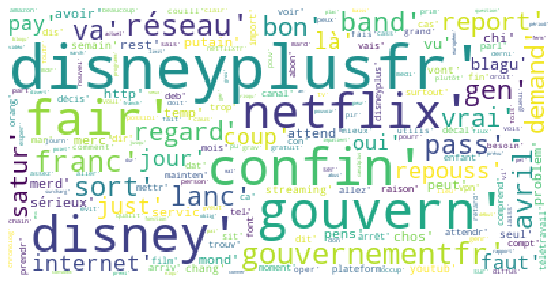

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
picture = WordCloud(background_color = 'white',collocations = False).generate(str(lemma))
plt.figure(figsize = (13,5))
plt.imshow(picture)
plt.axis('off')
plt.show()

In [9]:
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
senti = []
for i in df_french['text']:
    blob1 = tb(str(i))
    k = blob1.sentiment
    print(k)
    senti.append(k)

(0.0, 0.0)
(0.3333333333333333, 0.3333333333333333)
(0.0, 0.0)
(0.0, 0.3)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(-0.09666666666666668, 0.3)
(-0.4, 0.4)
(0.05, 0.4)
(-0.1725, 0.225)
(0.12399999999999997, 0.45999999999999996)
(0.0, 0.0)
(0.35, 0.30000000000000004)
(0.0, 0.0)
(-0.11499999999999999, 0.275)
(0.17, 0.0)
(0.11, 0.05)
(0.0, 0.0)
(-0.05, 0.30000000000000004)
(-0.007500000000000007, 0.36250000000000004)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(-0.52, 0.13)
(0.13333333333333333, 0.21666666666666667)
(0.2884185791015625, 0.425)
(0.0, 0.0)
(0.375, 0.0)
(0.06666666666666668, 0.15)
(0.0, 0.0)
(0.3, 0.2)
(0.125, 0.1)
(-0.05499999999999999, 0.5)
(-0.0775, 0.525)
(-0.5, 0.0)
(0.0, 0.0)
(0.15, 0.1)
(0.0, 0.0)
(0.1189453125, 0.21875)
(0.1075, 0.1125)
(0.01, 0.0)
(0.0, 0.0)
(-0.01, 0.0)
(0.35, 0.44999999999999996)
(0.25, 0.8)
(0.7, 0.7)
(-0.033333333333333326, 0.6666666666666666)
(0.06666666666666667, 0.3333333333333333)
(0.1875, 0.1)
(0.25, 0.1)
(0.01, 0.0)
(0.0349999

(0.3, 0.2)
(0.065, 0.3375)
(0.22, 0.1)
(0.06666666666666667, 0.2333333333333333)
(-0.3, 0.5)
(0.0, 0.0)
(0.0, 0.0)
(0.15, 0.375)
(-0.02, 0.375)
(-0.3125, 0.7)
(0.11333333333333333, 0.06666666666666667)
(0.0, 0.0)
(0.0, 0.0)
(0.06, 0.125)
(0.009999999999999995, 0.175)
(0.0, 0.5)
(-0.4375, 0.7)
(0.09333333333333334, 0.08333333333333333)
(-0.24, 0.2)
(-0.030833333333333338, 0.38333333333333336)
(0.14250000000000002, 0.2)
(-0.01, 0.0)
(0.0, 0.0)
(-0.0225, 0.2)
(0.0, 0.0)
(0.22, 0.1)
(0.0, 0.0)
(0.7, 0.7)
(0.0, 0.0)
(0.0, 0.0)
(0.05, 0.3)
(0.01, 0.0)
(-0.1, 0.2)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.2, 0.0)
(-0.11, 0.1)
(0.16199999999999998, 0.45999999999999996)
(0.7, 0.7)
(-0.05, 0.0)
(-0.25, 0.7)
(0.0, 0.0)
(-0.01, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.01, 0.0)
(0.35, 0.75)
(0.05, 0.55)
(-0.25, 0.7)
(0.0, 0.0)
(-0.01, 0.20000000000000004)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.22, 0.1)
(0.22000000000000003, 0.425)
(0.0, 0.0)
(0.0, 0.0)
(-0.095, 0.2)
(-0.199999999999999

(0.0, 0.5)
(-0.10833333333333334, 0.35000000000000003)
(0.075, 0.20000000000000004)
(0.16041666666666668, 0.3333333333333333)
(0.9099999999999999, 0.78)
(0.082, 0.16999999999999998)
(0.28, 0.3)
(0.34375, 0.1)
(0.0, 0.0)
(0.05, 0.3)
(0.0, 0.0)
(0.51123046875, 0.42500000000000004)
(0.08, 0.325)
(0.14, 0.6)
(0.095, 0.125)
(0.0, 0.0)
(0.005, 0.25)
(0.0, 0.0)
(-0.36000000000000004, 0.4000000000000001)
(0.0, 0.0)
(0.0475, 0.175)
(-0.0025, 0.0)
(0.0, 0.2)
(0.0, 0.0)
(-0.064, 0.04)
(-0.118, 0.41)
(-0.2333333333333333, 0.43333333333333335)
(0.0, 0.2333333333333333)
(-0.029583333333333333, 0.19999999999999998)
(-0.12, 0.35)
(0.0, 0.0)
(0.0, 0.0)
(0.3066666666666667, 0.13333333333333333)
(0.2, 0.0)
(0.0, 0.0)
(0.7, 0.7)
(0.0, 0.0)
(0.01, 0.0)
(0.12333333333333335, 0.20000000000000004)
(0.2, 0.5)
(0.01, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(-0.13428571428571429, 0.27142857142857146)
(0.06000000000000002, 0.13333333333333333)
(0.27, 0.35)
(-0.425, 0.675)
(0.0, 0.0)
(-0.18375, 0.4)
(-0.29000000000000004, 0.45

(0.0, 0.0)
(0.440625, 0.44999999999999996)
(0.35, 0.1)
(0.06, 0.15000000000000002)
(-0.10500000000000001, 0.125)
(0.21750000000000003, 0.1)
(0.045, 0.15)
(-0.01, 0.0)
(0.1475, 0.1)
(0.0, 0.0)
(0.015000000000000001, 0.18333333333333335)
(0.0, 0.0)
(0.1725, 0.3)
(0.7875, 0.7)
(0.36999999999999994, 0.5333333333333333)
(-0.63427734375, 0.5)
(0.0, 0.4)
(0.0, 0.0)
(0.0, 0.0)
(0.019999999999999997, 0.29000000000000004)
(0.1366666666666667, 0.22499999999999998)
(0.0, 0.0)
(0.22, 0.1)
(0.15, 0.075)
(0.02666666666666667, 0.03333333333333333)
(0.05, 0.4)
(0.0, 0.0)
(0.3, 0.6)
(0.0, 0.0)
(0.25, 0.1)
(0.0, 0.0)
(0.25, 1.0)
(0.13333333333333333, 0.16666666666666663)
(0.0049999999999999975, 0.15)
(0.0, 0.0)
(-0.05833333333333333, 0.3666666666666667)
(0.22166666666666668, 0.23333333333333336)
(-0.7, 0.8)
(0.5983333333333333, 0.5)
(0.0, 0.0)
(-0.015625, 0.0)
(0.045, 0.05)
(-0.15, 0.1)
(0.022500000000000003, 0.12272727272727274)
(-0.01, 0.0)
(0.19, 0.75)
(0.0, 0.0)
(0.45, 0.55)
(-0.045, 0.175)
(0.152, 0

(0.25, 1.0)
(0.0, 0.0)
(0.75, 0.75)
(0.125, 0.1)
(-0.1, 0.15)
(0.0, 0.0)
(-0.2, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.16375, 0.425)
(0.15, 0.325)
(0.0, 0.0)
(1.0, 0.7)
(-0.3, 0.5)
(0.0, 0.0)
(0.0, 0.0)
(0.056666666666666664, 0.0)
(0.075, 0.05)
(0.7, 0.9)
(-0.049999999999999996, 0.2333333333333333)
(0.22, 0.1)
(0.09499999999999999, 0.11666666666666665)
(0.088, 0.25)
(0.044, 0.16)
(-0.35, 0.45)
(0.0, 0.0)
(-0.205, 0.26)
(0.45, 0.55)
(0.2475, 0.1)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.075, 0.6333333333333334)
(0.15, 0.1)
(0.0, 0.0)
(0.22, 0.1)
(-0.7, 0.9)
(0.0, 0.0)
(0.0, 0.0)
(-0.10000000000000002, 0.25)
(0.0, 0.0)
(0.12333333333333334, 0.13333333333333333)
(0.0, 0.0)
(0.046458333333333324, 0.15)
(0.01, 0.0)
(-0.092, 0.15)
(0.0, 0.0)
(0.06, 0.09000000000000001)
(-0.85, 0.85)
(0.18000000000000002, 0.19999999999999998)
(-0.6, 0.30000000000000004)
(-0.5, 0.4)
(0.0, 0.0)
(0.05, 0.4)
(0.0, 0.0)
(-0.06, -0.125)
(0.0, 0.0)
(0.0825, 0.13333333333333333)
(0.01, 0.0)
(0.45, 0.55)
(0.0,

(-0.15625, 0.2)
(-0.0244140625, 0.0)
(-0.04, 0.25)
(-0.5, 0.7)
(-0.85, 0.7)
(0.07916666666666666, 0.5333333333333333)
(0.1, 0.6)
(0.0, 0.0)
(0.0, 0.0)
(-0.16999999999999998, 0.09000000000000001)
(0.185, 0.15)
(0.0, 0.0)
(-0.4, 0.5)
(-0.02, 0.5166666666666667)
(0.125, 0.2)
(0.5233333333333333, 0.31666666666666665)
(0.16, 0.05)
(0.06874999999999999, 0.05)
(0.26999999999999996, 2.964285714285714)
(-0.005, 0.25)
(0.08333333333333333, 0.3)
(0.1875, 0.20000000000000004)
(0.07139999999999999, 0.33399999999999996)
(0.0, 0.0)
(0.0, 0.0)
(0.9, 1.0)
(0.15, 0.15)
(0.075, 0.05)
(0.4, 0.0)
(0.0, 0.0)
(-0.10000000000000002, 0.16666666666666666)
(0.0, 0.0)
(0.048, 0.36)
(0.030000000000000027, 0.48333333333333334)
(-0.25, 0.7)
(0.1, 0.1)
(0.0, 0.0)
(0.16, 0.1)
(0.26399999999999996, 0.35)
(0.2, 0.05)
(-0.025, 0.125)
(0.2, 0.11)
(-0.30000000000000004, 0.45)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.05, 0.3)
(0.09, 0.35)
(0.0, 0.5)
(0.0, 0.0)
(0.05, 0.475)
(0.19128571428571428, 0.19642857142857142)
(-0.003125, 

(0.4166666666666667, 0.3833333333333333)
(0.0, 0.0)
(0.0, 0.0)
(0.35666666666666663, 0.3)
(0.0, 0.0)
(0.0, 0.0)
(-0.2410888671875, 0.1)
(0.0, 0.5)
(0.5, 0.5)
(0.15, 0.1)
(-0.7, 0.7)
(-0.5, 0.0)
(-0.25, 0.35)
(0.7000000000000001, 0.7333333333333334)
(0.0, 0.0)
(0.1875, 0.2)
(0.015, -0.075)
(0.10400000000000001, 0.13)
(-0.13749999999999998, 0.5)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.2)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(-0.5, 0.0)
(0.0, 0.0)
(0.005999999999999994, 0.18)
(0.0, 0.0)
(0.0, 0.0)
(0.08, 0.125)
(0.18, 0.27999999999999997)
(-0.7, 0.4)
(0.049999999999999996, 0.33999999999999997)
(-0.1, 0.0)
(0.06333333333333334, 0.4166666666666667)
(0.225, 0.6)
(0.155, 0.275)
(0.11, 0.17500000000000002)
(0.0, 0.0)
(0.0, 0.0)
(0.5, 1.0)
(-0.05, 0.0)
(0.0, 0.1)
(0.0, 0.0)
(-0.4, 0.8)
(-0.04, 0.25)
(0.19999999999999998, 0.06666666666666667)
(0.0, 0.0)
(0.0, 0.0)
(0.07250000000000001, 0.15000000000000002)
(-0.1575, 0.45)
(0.0, 0.0)
(-0.055, 0.0625)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.65)
(0.0

(-0.11666666666666665, 0.10000000000000002)
(0.12, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(-1.0, 0.3)
(0.0, 0.0)
(-0.05, -0.1)
(-0.6708333333333334, 0.7000000000000001)
(-0.2, 0.3)
(0.0, 0.0)
(0.0, 0.1)
(0.0, 0.0)
(0.125, 0.7)
(0.0, 0.0)
(0.53, 0.5)
(0.6, 0.6)
(0.22, 0.45)
(-0.34708333333333335, 0.4666666666666666)
(-0.67, 0.65)
(0.0, 0.0)
(0.0, 0.0)
(0.125, 0.7)
(-0.15000000000000002, 0.85)
(0.15, 0.0)
(0.17, 0.35000000000000003)
(0.0, 0.0)
(-0.06499999999999997, 0.2375)
(-0.03000000000000001, 0.29000000000000004)
(0.0, 0.0)
(-0.5859375, 0.375)
(0.0, 0.0)
(0.075, 0.3)
(0.0, 0.0)
(0.0, 0.0)
(-0.10791666666666666, 0.5333333333333333)
(-0.3125, 0.55)
(-0.18125, 0.375)
(0.08, 0.2)
(0.042857142857142864, 0.22857142857142856)
(0.0, 0.5)
(0.0, 0.0)
(0.2, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(-0.2, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.06, 0.05)
(0.18, 0.2)
(0.0, 0.0)
(0.033999999999999996, 0.09)
(-0.5, 0.5)
(-0.305, 0.525)
(0.22, 0.1)
(0.22, 0.1)
(0.0, 0.0)
(-0.23666666666666666, 0.349999

(0.1, 0.1)
(0.16, 0.2375)
(0.0, 0.0)
(0.3, 0.25)
(1.0, 0.7)
(0.1, 0.1)
(-0.3125, 0.7)
(0.0, 0.0)
(0.3, 0.2)
(0.0, 0.0)
(-0.045000000000000005, 0.0)
(0.0, 0.0)
(0.1, 0.6)
(0.22, 0.1)
(0.2, 0.175)
(0.11666666666666665, 0.10000000000000002)
(0.0, 0.0)
(-0.01, 0.0)
(-0.125, 0.35)
(0.01, 0.0)
(0.22, 0.1)
(0.07500000000000001, 0.25)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.14, 0.16666666666666666)
(0.13999999999999999, 0.06666666666666667)
(-0.036666666666666646, 0.34166666666666673)
(0.0675, 0.125)
(0.0, 0.2)
(0.15, 0.1)
(0.0, 0.0)
(-0.8, 0.2)
(0.0, 0.0)
(0.3, 0.2)
(0.0, 0.0)
(0.045000000000000005, 0.3)
(0.0, 0.0)
(0.0, 0.0)
(-0.48828125, 0.7)
(-0.125, 0.1)
(0.1875, 0.1)
(0.1, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.22, 0.1)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.24000000000000002, 0.10000000000000002)
(0.05, 0.4)
(0.0, 0.0)
(0.0, 0.0)
(0.1, 0.42500000000000004)
(-0.1, 0.16999999999999998)
(-0.05, 0.39999999999999997)
(0.01, 0.0)
(0.1, 0.05)
(0.1, 0.6)
(0.0, 0.5)
(0.185, 0.375)
(0.0, 0.0)
(0.1500000000000000

In [10]:
df_french['senti'] = senti
df_french.head()
df_senti = pd.DataFrame(df_french['senti'].values.tolist(), columns=['Polarity','Subjectivity'])

In [11]:
import numpy as np
bins = [-np.inf,0,0.333,0.666,1,np.inf]
labels = ['Not subjective','Slightly subjective','Quite subjective','Subjective','Highly subjective']
df_senti['sub'] = pd.cut(df_senti['Subjectivity'], bins = bins, labels = labels)
df_senti.head()

,Polarity,Subjectivity,sub
0,0.000000,0.000000,Not subjective
1,0.333333,0.333333,Quite subjective
2,0.000000,0.000000,Not subjective
3,0.000000,0.300000,Slightly subjective
4,0.000000,0.000000,Not subjective


In [30]:
count = df_senti.groupby('sub').count()
count

,Polarity,Subjectivity,polarity_score
sub,,,
Not subjective,1811,1811,1811
Slightly subjective,1555,1555,1555
Quite subjective,950,950,950
Subjective,243,243,243
Highly subjective,14,14,14


In [13]:
bins = [-np.inf,-0.0001,0.001,np.inf]
labels = ['neg','neu','pos']
df_senti['polarity_score'] = pd.cut(df_senti['Polarity'],labels = labels, bins = bins)

In [14]:
df_senti.head()

,Polarity,Subjectivity,sub,polarity_score
0,0.000000,0.000000,Not subjective,neu
1,0.333333,0.333333,Quite subjective,pos
2,0.000000,0.000000,Not subjective,neu
3,0.000000,0.300000,Slightly subjective,neu
4,0.000000,0.000000,Not subjective,neu


In [36]:
countt = df_senti.groupby(['polarity_score','sub']).count()
countt

Polarity  Subjectivity
polarity_score sub                                        
neg            Not subjective       174.0     174.0       
               Slightly subjective  377.0     377.0       
               Quite subjective     332.0     332.0       
               Subjective           118.0     118.0       
               Highly subjective    5.0       5.0         
neu            Not subjective       1511.0    1511.0      
               Slightly subjective  110.0     110.0       
               Quite subjective     98.0      98.0        
               Subjective           4.0       4.0         
               Highly subjective   NaN       NaN          
pos            Not subjective       126.0     126.0       
               Slightly subjective  1068.0    1068.0      
               Quite subjective     520.0     520.0       
               Subjective           121.0     121.0       
               Highly subjective    9.0       9.0